<a href="https://colab.research.google.com/github/koushik1904/Natural-language-processing-NLB-/blob/main/NLP_LAB03_2403a52057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install nltk spacy

!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
# Import libraries
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
essay_text = """
Academic writing plays a crucial role in higher education.
It allows researchers to present arguments, analyze data,
and communicate findings in a structured and formal manner.
Effective academic writing requires clarity, precision,
and the use of discipline-specific vocabulary.
"""


In [5]:
print("Academic Essay Text:\n")
print(essay_text)


Academic Essay Text:


Academic writing plays a crucial role in higher education.
It allows researchers to present arguments, analyze data,
and communicate findings in a structured and formal manner.
Effective academic writing requires clarity, precision,
and the use of discipline-specific vocabulary.



In [6]:
nltk.download('punkt_tab')
tokens = nltk.word_tokenize(essay_text)
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Academic', 'writing', 'plays', 'a', 'crucial', 'role', 'in', 'higher', 'education', '.', 'It', 'allows', 'researchers', 'to', 'present', 'arguments', ',', 'analyze', 'data', ',', 'and', 'communicate', 'findings', 'in', 'a', 'structured', 'and', 'formal', 'manner', '.', 'Effective', 'academic', 'writing', 'requires', 'clarity', ',', 'precision', ',', 'and', 'the', 'use', 'of', 'discipline-specific', 'vocabulary', '.']


In [7]:
nltk.download('averaged_perceptron_tagger_eng')
nltk_pos_tags = nltk.pos_tag(tokens)
nltk_pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('Academic', 'NNP'),
 ('writing', 'NN'),
 ('plays', 'VBZ'),
 ('a', 'DT'),
 ('crucial', 'JJ'),
 ('role', 'NN'),
 ('in', 'IN'),
 ('higher', 'JJR'),
 ('education', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ('allows', 'VBZ'),
 ('researchers', 'NNS'),
 ('to', 'TO'),
 ('present', 'JJ'),
 ('arguments', 'NNS'),
 (',', ','),
 ('analyze', 'NN'),
 ('data', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('communicate', 'JJ'),
 ('findings', 'NNS'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('structured', 'JJ'),
 ('and', 'CC'),
 ('formal', 'JJ'),
 ('manner', 'NN'),
 ('.', '.'),
 ('Effective', 'JJ'),
 ('academic', 'JJ'),
 ('writing', 'NN'),
 ('requires', 'VBZ'),
 ('clarity', 'NN'),
 (',', ','),
 ('precision', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('use', 'NN'),
 ('of', 'IN'),
 ('discipline-specific', 'JJ'),
 ('vocabulary', 'NN'),
 ('.', '.')]

In [8]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(essay_text)

spacy_pos_tags = [(token.text, token.pos_) for token in doc]
spacy_pos_tags


[('\n', 'SPACE'),
 ('Academic', 'ADJ'),
 ('writing', 'NOUN'),
 ('plays', 'VERB'),
 ('a', 'DET'),
 ('crucial', 'ADJ'),
 ('role', 'NOUN'),
 ('in', 'ADP'),
 ('higher', 'ADJ'),
 ('education', 'NOUN'),
 ('.', 'PUNCT'),
 ('\n', 'SPACE'),
 ('It', 'PRON'),
 ('allows', 'VERB'),
 ('researchers', 'NOUN'),
 ('to', 'ADP'),
 ('present', 'ADJ'),
 ('arguments', 'NOUN'),
 (',', 'PUNCT'),
 ('analyze', 'VERB'),
 ('data', 'NOUN'),
 (',', 'PUNCT'),
 ('\n', 'SPACE'),
 ('and', 'CCONJ'),
 ('communicate', 'VERB'),
 ('findings', 'NOUN'),
 ('in', 'ADP'),
 ('a', 'DET'),
 ('structured', 'ADJ'),
 ('and', 'CCONJ'),
 ('formal', 'ADJ'),
 ('manner', 'NOUN'),
 ('.', 'PUNCT'),
 ('\n', 'SPACE'),
 ('Effective', 'ADJ'),
 ('academic', 'ADJ'),
 ('writing', 'NOUN'),
 ('requires', 'VERB'),
 ('clarity', 'NOUN'),
 (',', 'PUNCT'),
 ('precision', 'NOUN'),
 (',', 'PUNCT'),
 ('\n', 'SPACE'),
 ('and', 'CCONJ'),
 ('the', 'DET'),
 ('use', 'NOUN'),
 ('of', 'ADP'),
 ('discipline', 'NOUN'),
 ('-', 'PUNCT'),
 ('specific', 'ADJ'),
 ('vocabul

In [9]:
nouns = [token.text.lower() for token in doc if token.pos_ == "NOUN"]
verbs = [token.text.lower() for token in doc if token.pos_ == "VERB"]

print("Nouns (Concepts):", nouns)
print("Verbs (Arguments):", verbs)


Nouns (Concepts): ['writing', 'role', 'education', 'researchers', 'arguments', 'data', 'findings', 'manner', 'writing', 'clarity', 'precision', 'use', 'discipline', 'vocabulary']
Verbs (Arguments): ['plays', 'allows', 'analyze', 'communicate', 'requires']


In [10]:
noun_freq = Counter(nouns)
verb_freq = Counter(verbs)

noun_freq, verb_freq


(Counter({'writing': 2,
          'role': 1,
          'education': 1,
          'researchers': 1,
          'arguments': 1,
          'data': 1,
          'findings': 1,
          'manner': 1,
          'clarity': 1,
          'precision': 1,
          'use': 1,
          'discipline': 1,
          'vocabulary': 1}),
 Counter({'plays': 1,
          'allows': 1,
          'analyze': 1,
          'communicate': 1,
          'requires': 1}))

In [11]:
noun_df = pd.DataFrame(noun_freq.items(), columns=["Noun", "Frequency"])
verb_df = pd.DataFrame(verb_freq.items(), columns=["Verb", "Frequency"])

noun_df, verb_df


(           Noun  Frequency
 0       writing          2
 1          role          1
 2     education          1
 3   researchers          1
 4     arguments          1
 5          data          1
 6      findings          1
 7        manner          1
 8       clarity          1
 9     precision          1
 10          use          1
 11   discipline          1
 12   vocabulary          1,
           Verb  Frequency
 0        plays          1
 1       allows          1
 2      analyze          1
 3  communicate          1
 4     requires          1)

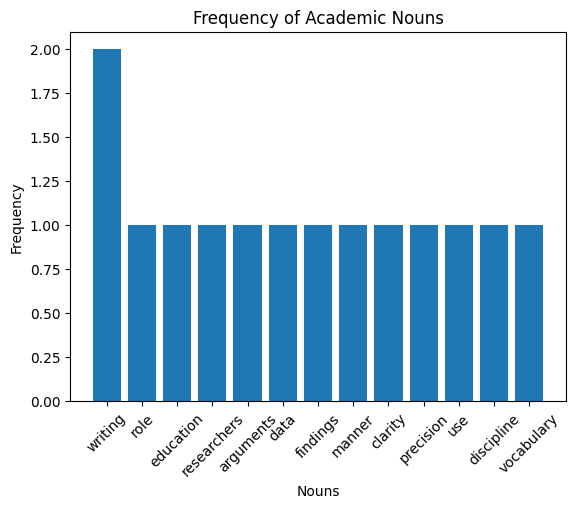

In [12]:
plt.figure()
plt.bar(noun_df["Noun"], noun_df["Frequency"])
plt.title("Frequency of Academic Nouns")
plt.xlabel("Nouns")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


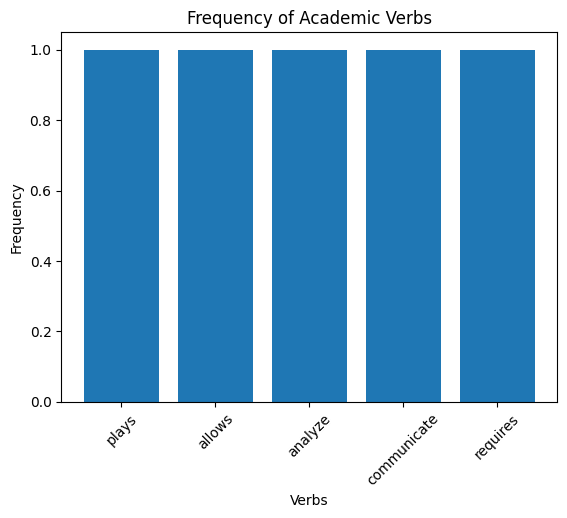

In [13]:
plt.figure()
plt.bar(verb_df["Verb"], verb_df["Frequency"])
plt.title("Frequency of Academic Verbs")
plt.xlabel("Verbs")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()
